In [1]:
from PIL import Image
import os
import numpy as np

# Assuming `images` is a numpy array of shape (40, height, width, 3)
# Also assuming `labels` is a numpy array of shape (40,) with values 0 or 1 indicating the class (cleaned or dirty)


# Assuming `images` is a numpy array of shape (40, height, width, 3)
# Also assuming `labels` is a numpy array of shape (40,) with values 0 or 1 indicating the class (cleaned or dirty)

train_path = "plates/train/"
labels = []
imgs_arr = []

class_names = os.listdir(train_path)

for i, class_name in enumerate(class_names):

    # load images and labels
    class_path = train_path + os.sep + class_name
    tmp_imgs_arr = [np.array(Image.open(class_path + os.sep + img_name).resize((224, 224))) for img_name in os.listdir(class_path)]
    tmp_labels = [i for _ in tmp_imgs_arr]

    # store images and labels from different classes on same list
    imgs_arr += tmp_imgs_arr
    labels = labels + tmp_labels



labels = np.array(labels)
imgs_arr = np.array(imgs_arr)

labels, imgs_arr.shape

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1]),
 (28, 224, 224, 3))

In [2]:


test_path = "plates/test/"
test_labels = []
test_imgs_arr = []

#class_names = os.listdir(train_path)

tmp_imgs_arr = [np.array(Image.open(test_path + os.sep + img_name).resize((224, 224))) for img_name in os.listdir(test_path)]
tmp_labels = [i for _ in tmp_imgs_arr]

# store images and labels from different classes on same list
test_imgs_arr += tmp_imgs_arr
#test_labels = test_labels + tmp_labels



#test_labels = np.array(test_labels)
test_imgs_arr = np.array(test_imgs_arr)

test_imgs_arr.shape

(744, 224, 224, 3)

In [3]:
# Flatten the images
flattened_images = imgs_arr.reshape(imgs_arr.shape[0], -1)  # (40, height * width * 3)

# Standardize the data
mean = np.mean(flattened_images, axis=0)
std = np.std(flattened_images, axis=0)
standardized_images = (flattened_images - mean) / std

In [4]:
# Flatten the images
flattened_images = test_imgs_arr.reshape(test_imgs_arr.shape[0], -1)  # (40, height * width * 3)

# Standardize the data
mean = np.mean(flattened_images, axis=0)
std = np.std(flattened_images, axis=0)
test_standardized_images = (flattened_images - mean) / std

In [5]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=3)
reduced_images_pca = pca.fit_transform(test_standardized_images)
reduced_images_pca

array([[ 233.93920974,  105.53178728, -105.50022748],
       [-113.83859581,  -14.67261935,  -59.81710763],
       [-126.92705612,   -7.14406796,  -20.98877022],
       ...,
       [ 125.73905478,  -77.26352383, -149.4960549 ],
       [-229.0836277 ,  -31.72482347,  -40.05689657],
       [ -31.92800307,  258.20660552,  -41.20387823]])

In [6]:


# Apply PCA to reduce to 2 dimensions
# pca = PCA(n_components=2)
reduced_images_pca = pca.transform(standardized_images)
reduced_images_pca

array([[  98.93674833,   -7.75376547,  -27.29531291],
       [-200.62360675,  -12.70214832,   50.37267968],
       [ 367.94265945,  -96.20754919,  -31.19648527],
       [ 100.24974414,  206.58667381,  -31.45940112],
       [-145.73557915,   10.77273397,   20.0511557 ],
       [ 413.88724413, -219.46298245, -101.32164294],
       [-200.74636462,   -4.2032839 ,   49.25218666],
       [-198.75781229,    7.01735839,    7.54402114],
       [-202.61786893,    4.01629036,    6.39315087],
       [ 159.60768438,  111.84376938, -101.31647039],
       [-213.18477867,    9.08865033,   27.83004985],
       [ 219.48531545,  235.9384438 ,  -47.82966453],
       [-214.11466167,   42.27373093,   46.97904471],
       [-281.88796434,  -47.76964035,   59.64078716],
       [ 240.2881799 ,   94.86904327,  -60.08833947],
       [-192.7878693 ,   15.06588996,   41.70603753],
       [ 156.814123  ,  162.46605495,  -41.04849785],
       [ 425.25767935, -209.80530094, -132.89847364],
       [ 335.72416554,  -47.

In [7]:
from sklearn.manifold import TSNE

# Apply t-SNE to reduce to 2 dimensions
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
reduced_images_tsne = tsne.fit_transform(test_standardized_images)
reduced_images_tsne

array([[ 16.235153  ,   8.08729   ],
       [-20.798138  ,   4.5590696 ],
       [-21.882292  ,   0.43932784],
       ...,
       [ 26.98555   ,   1.9735569 ],
       [-25.575073  ,  -2.4900162 ],
       [ -3.5463939 ,  14.522906  ]], dtype=float32)

In [8]:
reduced_images_tsne = tsne.fit_transform(np.concatenate([standardized_images,test_standardized_images]))
reduced_images_tsne

array([[ 10.4050045,   1.3899946],
       [-16.118185 ,  -6.481246 ],
       [ 24.649973 , -14.331041 ],
       ...,
       [ 30.151537 ,   5.4845786],
       [-29.248058 ,  -2.3557134],
       [ -2.1777778,  11.906618 ]], dtype=float32)

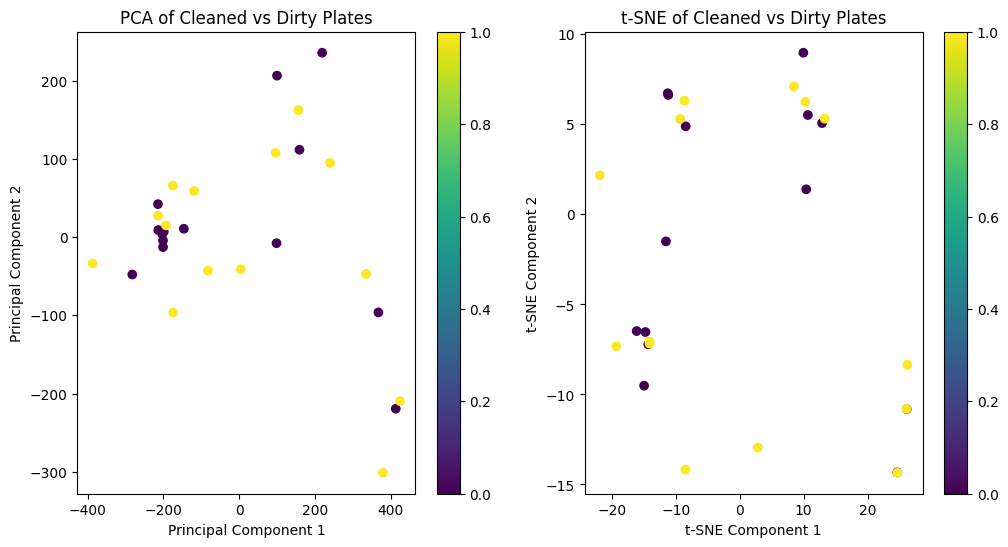

In [12]:
import matplotlib.pyplot as plt

# Plot PCA results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(reduced_images_pca[:, 0], reduced_images_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Cleaned vs Dirty Plates')
plt.colorbar()


# Plot t-SNE results
n_samples = len(imgs_arr)
plt.subplot(1, 2, 2)
plt.scatter(reduced_images_tsne[:n_samples, 0], reduced_images_tsne[:n_samples, 1], c=labels, cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Cleaned vs Dirty Plates')
plt.colorbar()

plt.show()


In [10]:
test_labels

[]